Задача 1
Постройте график. Назовите график. Сделайте именование оси x и оси y. Сделайте выводы

1.1.
Скачать следующие данные

1.2.
Изучите стоимости недвижимости

1.3.
Изучите распределение квадратуры жилой

1.4.
Изучите распределение года постройки

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1.1. Скачать следующие данные по ссылке

In [17]:
# Считать данные с помощью pandas
df = pd.read_csv("kc_house_data.csv", sep=',', encoding='windows-1251')
# Вывести на экран первые 5 строк
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


1.2. Изучите стоимости недвижимости

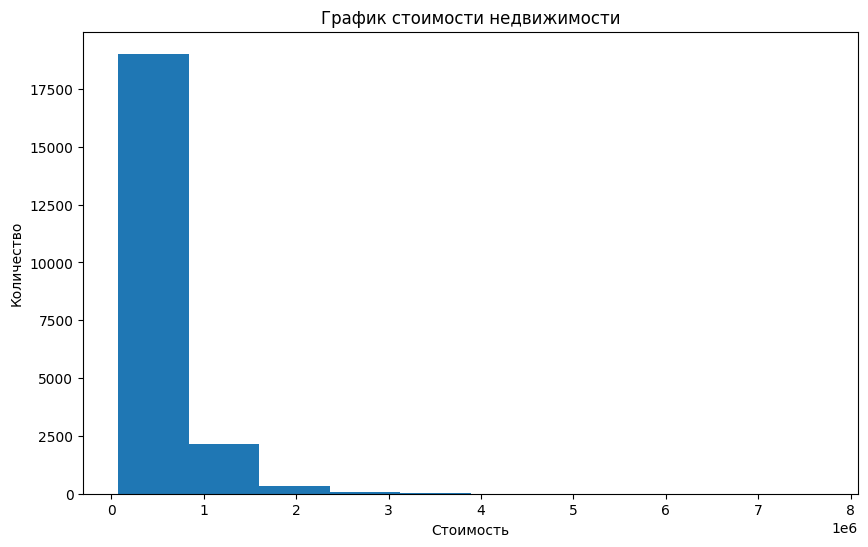

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
# рисование гистограммы (hist)
plt.hist(df['price'])
plt.title("График стоимости недвижимости")
plt.xlabel('Стоимость')
plt.ylabel('Количество');

Вывод: Большинство домов находятся в нижнем ценовом сегменте

1.3. Изучите распределение квадратуры жилой

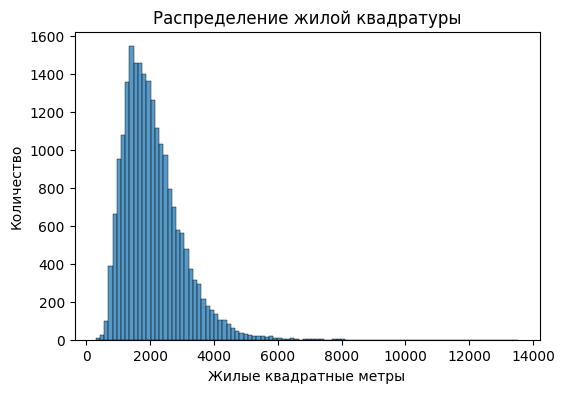

In [24]:
plt.figure(figsize = (6,4))
sns.histplot(df['sqft_living'], bins = 100)
plt.xlabel('Жилые квадратные метры')
plt.ylabel('Количество')
plt.title('Распределение жилой квадратуры');

Вывод: Максимальным спросом пользуется недвижимость с жилой площадью от 1500 до 2000 кв.м.

1.4. Изучите распределение года постройки

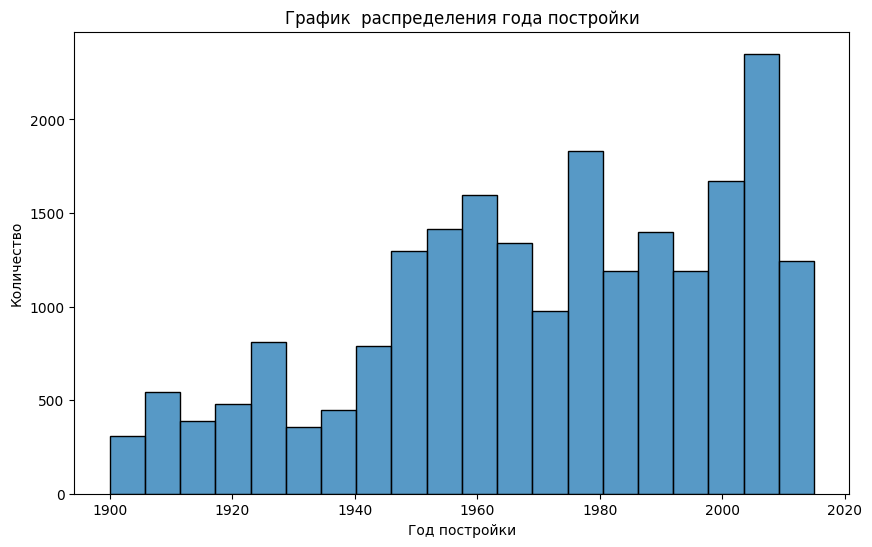

In [20]:
plt.figure(figsize=(10,6))
# рисование гистограммы (histplot)
sns.histplot(df['yr_built'], bins= 20)
plt.title("График  распределения года постройки")
plt.xlabel('Год постройки')
plt.ylabel('Количество');

Вывод: Спад в строительстве имел место в 1930-е гг., а также в начале 1970-х гг. Бурный рост пришелся на конец 1970-х гг, а также в 2005 г.

Задача 2

2.1.
Изучите распределение домов от наличия вида на набережную. Постройте график. Сделайте выводы

2.2.
Изучите распределение этажей домов

2.3.
Изучите распределение состояния домов

2.1. Изучите распределение домов от наличия вида на набережную. Постройте график. Сделайте выводы

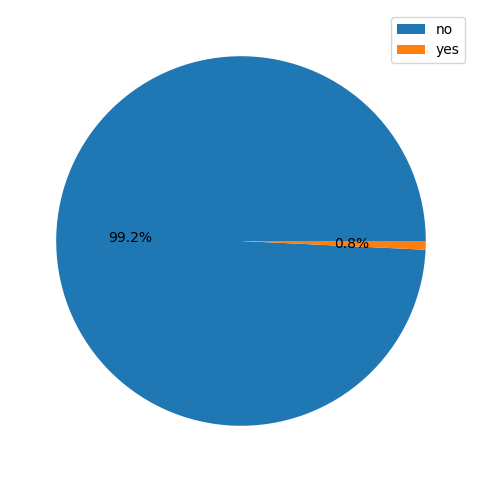

In [23]:
data = df['waterfront'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(data, autopct='%1.1f%%')
plt.legend(['no', 'yes']);

вывод: 0,8% продаанных домов имеют вид на набережную.

2.2. Изучите распределение этажей домов

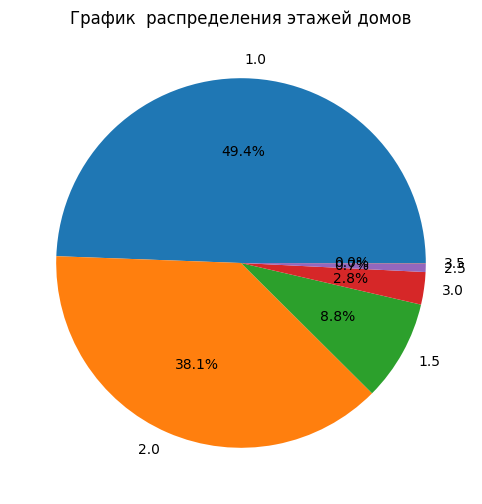

In [26]:
data = df['floors'].value_counts()
plt.figure(figsize=(10, 6))
plt.title("График  распределения этажей домов")
plt.pie(data, autopct='%1.1f%%', labels=data.index);

Вывод: Основная часть домов имеют 1 или 2 этажа.
Лидер продаж - 1-этажные дома (49,4%).

2.3. Изучите распределение состояния домов


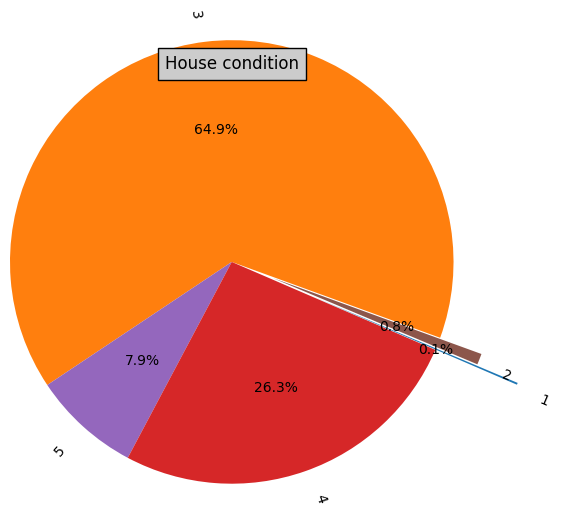

In [27]:
data_cond = df['condition'].value_counts(sort=False)
data_cond
cond_val= data_cond.values
cond_ind = data_cond.index
cond_explode = [0,0,0,0.6,0.3]
colors = ["#ff7f0e", "#9467bd", "#d62728","#1f77b4", "#8c564b"]
plt.title("House condition")
plt.pie(cond_val, labels=cond_ind, radius = 1.5,
        startangle=-20, colors=colors,
        rotatelabels=True, explode = cond_explode,
        labeldistance=1.1, autopct='%.1f%%')
plt.title("House condition", bbox={'facecolor':'0.8', 'pad':5})
plt.show;


Вывод: Большая часть домов находится в среднем состоянии - 64,9%. Менее 1% - в плохом.

Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [28]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


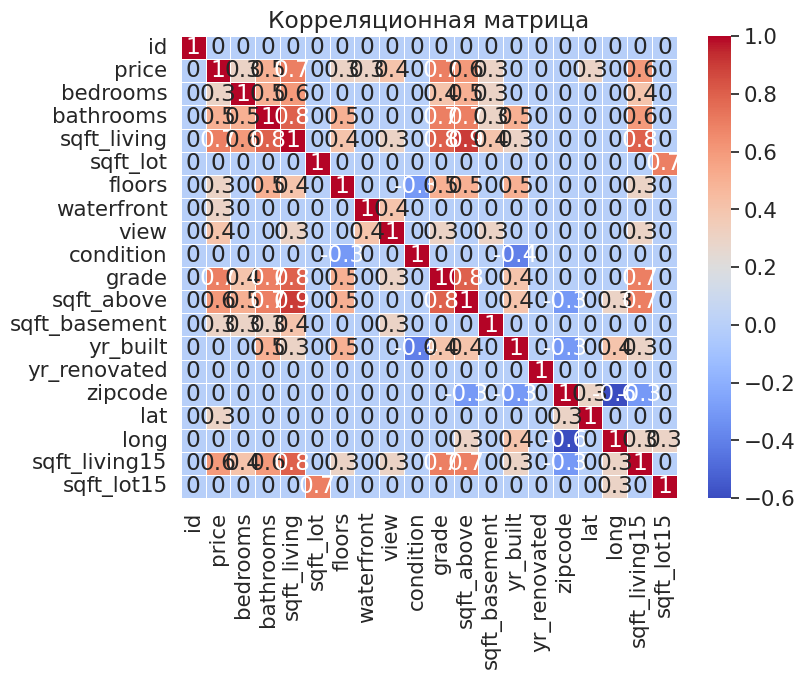

In [29]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Корреляционная матрица');

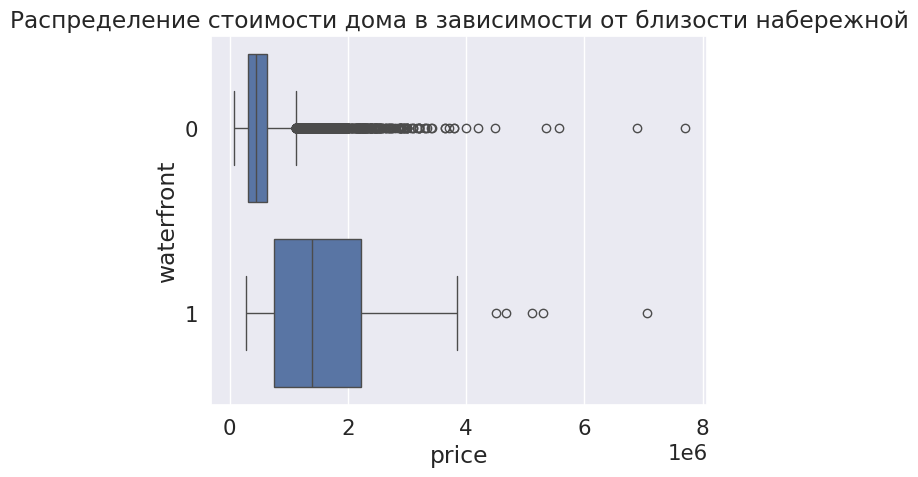

In [31]:
sns.boxplot(x=df['price'], y=df['waterfront'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('waterfront')
plt.title('Распределение стоимости дома в зависимости от близости набережной');

Вывод: Дома по близости от набережной имеют большую стоимость.

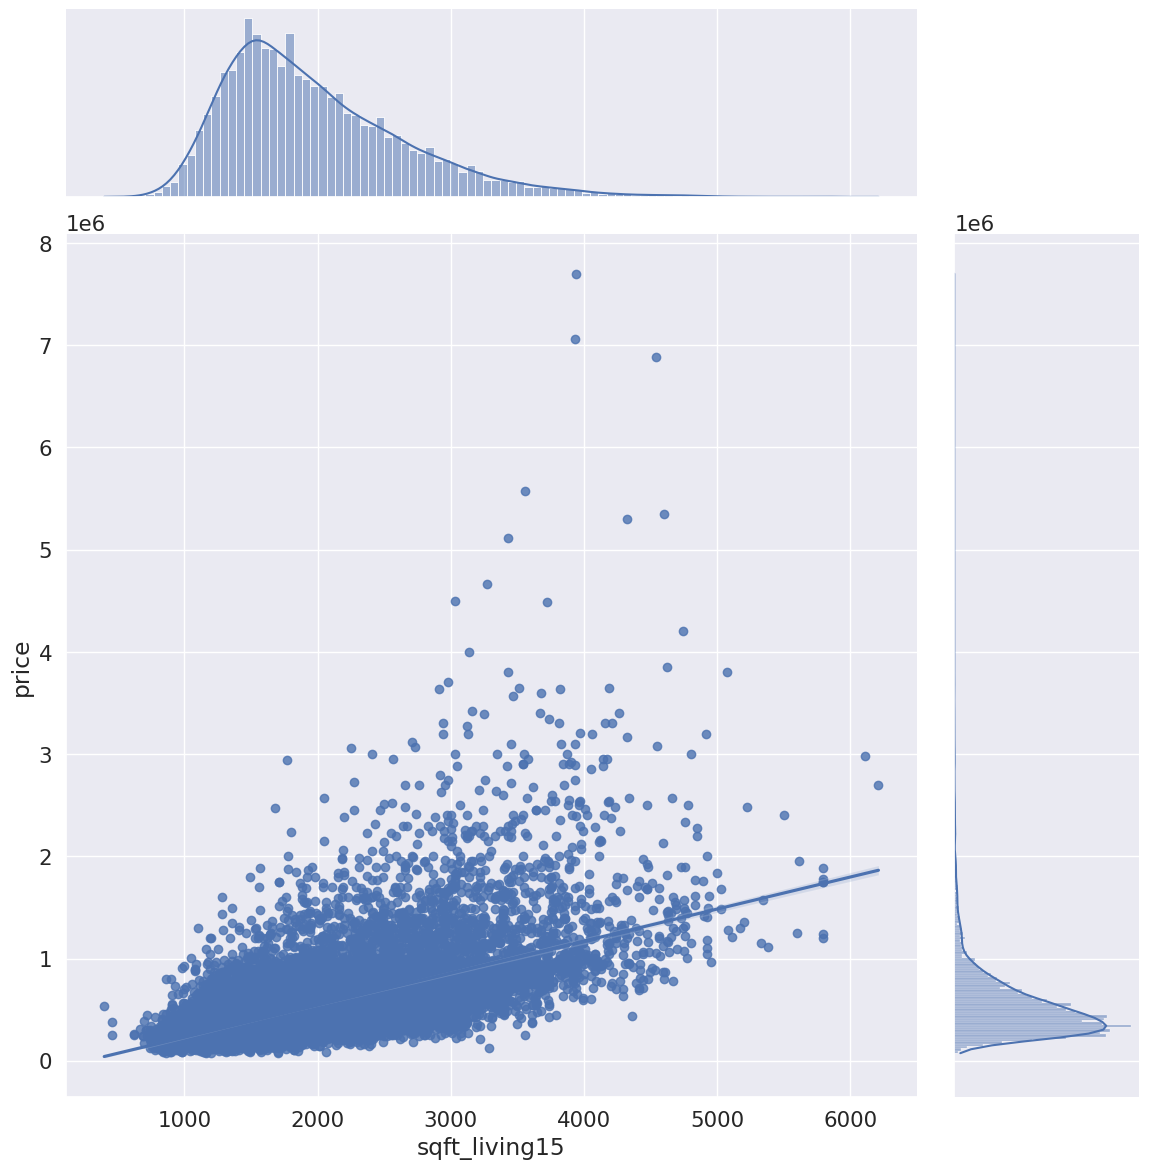

In [33]:
sns.jointplot(data=df, x="sqft_living15", y="price", kind="reg", height=12, ratio=4);

Вывод: количество метров жилой площади не является основным определяющим цену фактором: дом меньшей площади может стоить дороже более просторного дома.

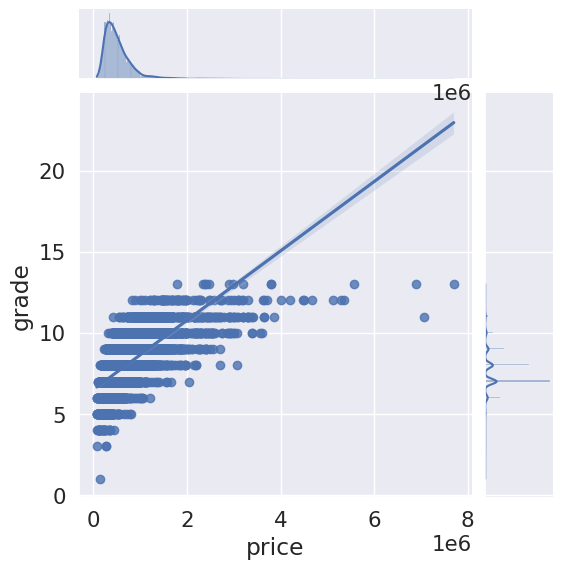

In [34]:
sns.jointplot(x=df['price'], y=df['grade'], kind='reg');

Вывод: Чем выше качество дома, тем выше его стоимость

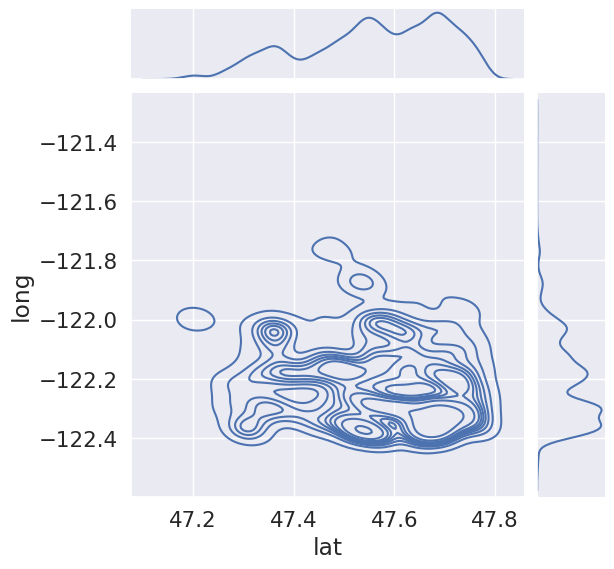

In [35]:
sns.jointplot(x=df['lat'], y=df['long'], kind='kde');

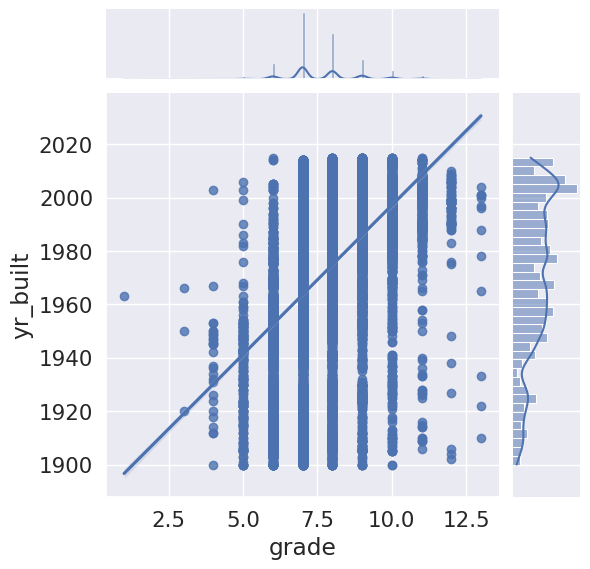

In [36]:
sns.jointplot(x=df['grade'], y=df['yr_built'], kind='reg')

Вывод: со временем качество домой улучшалось.